**2021年度 東京成徳大学 特別講座 資料**<br>
**東京工科大学コンピュータサイエンス学部**<br>
**福西広晃**

----

- **talibのライブラリをインストールすると、グラフの画像出力にエラーを生じる可能性が高いことがわかったので、別プログラムのこちらで行います**
<br><br>
- **このプログラムを実行するためには、`05_特別講座資料_配布用_v2.ipynb`において、移動平均、MACD、RSI、ボリンジャーバンドの結果をcsvファイルで出力しておく必要があります。`05_特別講座資料_配布用_v2.ipynb`にて「様々な指標を追加したデータフレームのファイル出力」を追加していますので、改めて`05_特別講座資料_配布用_v2.ipynb`の各セルを実行した後に、こちらをお使いください。**

**準備**
- Google Colaboratoryにgoogleドライブ上のファイルを読み込みたい場合（またはデータを出力したい場合）は以下を実行しておく必要がある（毎回の作業前）
  - Go to this URL in a browserの後に記載されているリンク先をクリックして、指示通りに許可やログインをすると、コードが表示される
  - コードをコピーして、Enter your authorization codeに張り付けてEnterキーを押す
  - Colab Notebooksフォルダにdatasetフォルダを作成し、AAA.csvを置いたとする。これをpandasで読み込む場合の例は、<br>
  `df = pd.read_csv("drive/My Drive/Colab Notebooks/dataset/AAA.csv", encoding="shift_jis")`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# japanize-matplotlib　（グラフ日本語対応）
!pip install japanize-matplotlib

----

# データ読み込み

In [31]:
import pandas as pd 

# 出力ファイル名を指定（Googleドライブの場合）
inpfile = "drive/My Drive/Colab Notebooks/05_最終データ_日経平均.csv"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
#inpfile = "05_最終データ_日経平均.csv"

# 時系列データの読込の基本
df_N225 = pd.read_csv(inpfile, encoding="shift_jis", index_col='Date', parse_dates=True, dtype='float')

# 開始日時と終了日時を取得
start = df_N225.index[0]
end   = df_N225.index[-1]

display(df_N225)
print(start, end)

,Open,High,Low,Close,Volume,sma_short,sma_midium,sma_long,macd,macdSig,macdHist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2019-06-03,20327.87,20438.03,20305.74,20410.88,6.952471e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-04,20435.86,20464.57,20290.16,20408.54,7.130015e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05,20667.89,20800.64,20646.15,20776.10,7.447051e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-06,20745.84,20842.28,20745.84,20774.04,6.142325e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-07,20859.78,20907.06,20817.07,20884.71,5.227013e+08,20650.854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-26,20927.96,21327.86,20918.11,21271.17,8.719113e+08,20709.688,20011.2048,19224.4638,346.893704,260.823060,86.070644,66.263337,21048.078091,20011.2048,18974.331509
2020-05-27,21249.31,21473.68,21143.37,21419.23,1.120168e+09,20874.504,20096.3660,19264.5272,398.285084,288.315465,109.969620,67.588409,21227.792723,20096.3660,18964.939277
2020-05-28,21612.90,21917.43,21580.50,21916.31,1.340312e+09,21147.304,20177.1280,19331.6608,473.663230,325.385018,148.278213,71.618752,21510.411504,20177.1280,18843.844496


2019-06-03 00:00:00 2020-06-01 00:00:00


# 時系列グラフ作成

**日経平均のグラフを作成**

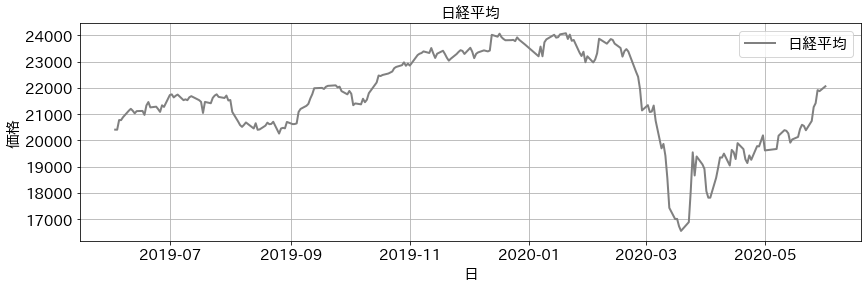

In [32]:
import matplotlib.pyplot as plt # グラフ作成
import japanize_matplotlib      # 日本語対応
import warnings                 # 警告を表示しないようにするライブラリ
warnings.simplefilter('ignore')  # 警告を表示しない設定
%matplotlib inline

#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
# x軸,y軸に対応するデータを取得
name   = "日経平均"       # 企業名など
date   = df_N225.index    # インデックスの日時を取得
price  = df_N225['Close'] # 終値を取得
#------------------------------------------------------------------

# グラフ作成前に設定するオプション
plt.figure(figsize=(14, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル、線幅、色を指定
plt.plot(date, price, label=name, linewidth = 2, color = 'gray') 

# 追加オプション
plt.title(name,fontsize=15)               # グラフタイトル
plt.xlabel('日',fontsize=15)              # x軸ラベル
plt.ylabel('価格',fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="best") # 凡例
plt.grid()                                # 補助線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/05_グラフ_"+name+".png"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
#outfile = "05_グラフ_"+name+".png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

# 移動平均のグラフ作成

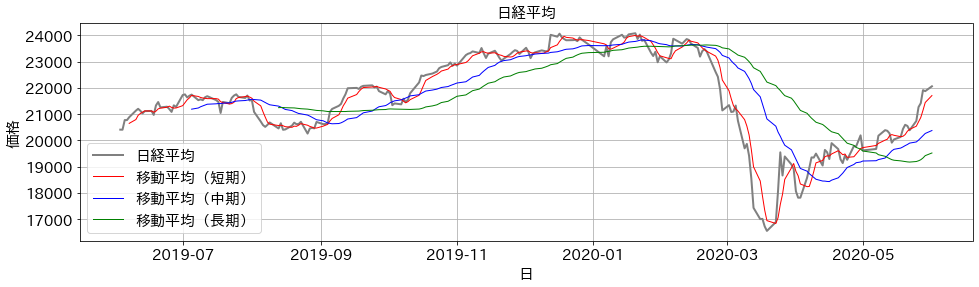

In [33]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name       = "日経平均"             # 銘柄名(任意の名前)
date       = df_N225.index          # インデックスの日時を取得
price      = df_N225['Close']       # 終値を取得
sma_short  = df_N225['sma_short']   # 5日移動平均を取得
sma_midium = df_N225['sma_midium']  # 25日移動平均を取得
sma_long   = df_N225['sma_long']    # 50日移動平均を取得
#------------------------------------------------------------------

# グラフ作成前に設定するオプション
plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル、線幅、色
plt.plot(date, price,      label = name,               linewidth = 2, color = 'gray') 
plt.plot(date, sma_short,  label = '移動平均（短期）', linewidth = 1, color = 'red')
plt.plot(date, sma_midium, label = '移動平均（中期）', linewidth = 1, color = 'blue')
plt.plot(date, sma_long,   label = '移動平均（長期）', linewidth = 1, color = 'green')

# 追加オプション
plt.title(name,fontsize=15)         # グラフタイトル
plt.xlabel('日',fontsize=15)        # x軸ラベル
plt.ylabel('価格',fontsize=15)      # y軸ラベル
plt.xticks(fontsize=15)             # x軸の目盛文字サイズ
plt.yticks(fontsize=15)             # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="best") # 凡例
plt.grid()                          # 補助線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/05_グラフ_"+name+"_移動平均.png"

# # 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
#outfile = "05_グラフ_"+name+"_移動平均.png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

# MACDのグラフ作成

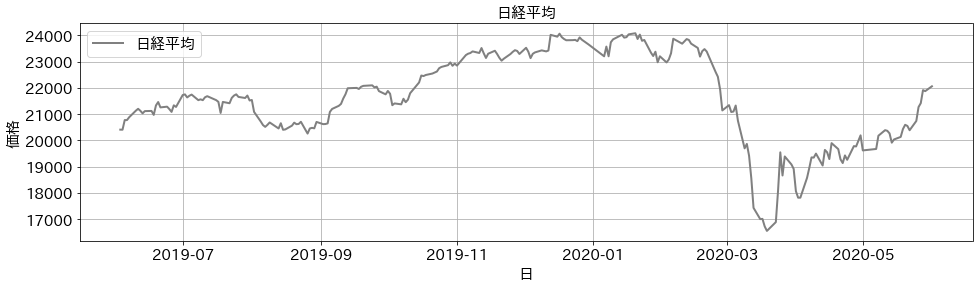

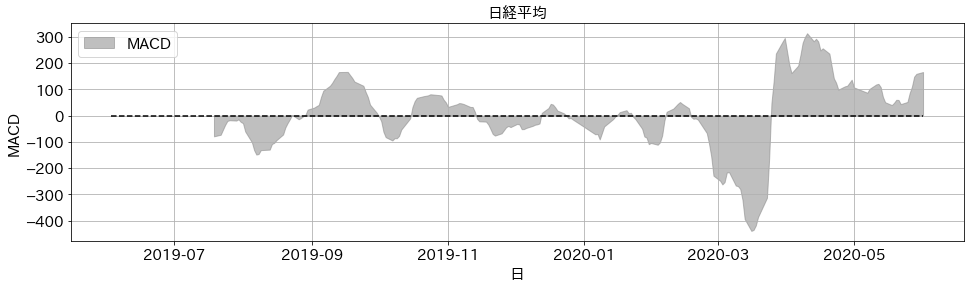

In [34]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name   = "日経平均"           # 銘柄名(任意の名前)
date   = df_N225.index        # インデックスの日時を取得
price  = df_N225['Close']     # 終値を取得
macd   = df_N225['macdHist']  # macdの作図用データ
#------------------------------------------------------------------

#-------------------
# グラフ1：日経平均
#-------------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.plot(date, price, label=name, linewidth=2, color="gray")

# 追加オプション
plt.title(name, fontsize=15)               # グラフタイトル
plt.xlabel('日', fontsize=15)              # x軸ラベル
plt.ylabel('価格', fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)             # x軸の目盛文字サイズ
plt.yticks(fontsize=15)             # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="upper left")  # 凡例
plt.grid()                                 # 補助線    
plt.show()

#-------------------
# グラフ2：MACD
#-------------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.fill_between(date, macd, label='MACD', color='grey', alpha=0.5)

# 追加オプション
plt.title(name, fontsize=15)               # グラフタイトル
plt.xlabel("日", fontsize=15)              # x軸ラベル
plt.ylabel("MACD", fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)             # x軸の目盛文字サイズ
plt.yticks(fontsize=15)             # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="upper left")  # 凡例
plt.grid()                                 # 補助線    
plt.hlines(0, start, end, 'black', linestyles='dashed') # 水平線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/05_グラフ_"+name+"_MACD.png"

# 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
#outfile = "05_グラフ_"+name+"_MACD.png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存
plt.show()

# RSIのグラフ作成

<Figure size 1008x504 with 0 Axes>

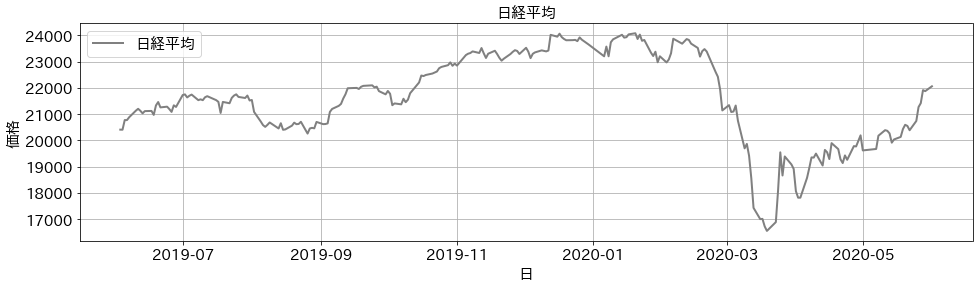

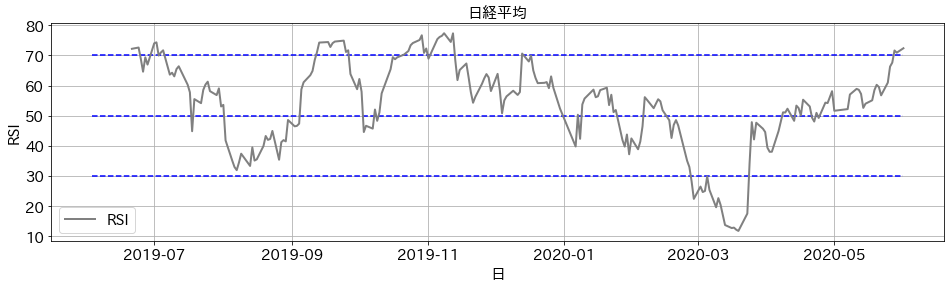

In [35]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name   = "日経平均"      # 銘柄名(任意の名前)
date  = df_N225.index    # インデックスの日時を取得
price = df_N225['Close'] # 終値を取得
rsi   = df_N225['RSI']   # RSI取得
#------------------------------------------------------------------

# グラフ描画枠作成（２つのグラフを並べるキャンパスを設定）
fig = plt.figure(figsize=(14, 7), tight_layout=True) 

#-------------------
# グラフ1：日経平均
#-------------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.plot(date, price, label=name, linewidth=2, color="gray")

# 追加オプション
plt.title(name, fontsize=15)         # グラフタイトル
plt.xlabel("日", fontsize=15)              # x軸ラベル
plt.ylabel("価格", fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)             # x軸の目盛文字サイズ
plt.yticks(fontsize=15)             # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="upper left")  # 凡例
plt.grid()                                 # 補助線    
plt.show()                                 

#----------------
# # グラフ2: RSI
#----------------
# グラフサイズの変更
plt.figure(figsize=(16, 4)) 

# グラフ作成
plt.plot(date, rsi, label='RSI', linewidth=2, color='gray')

#　追加オプション
plt.title(name,fontsize=15)              # グラフタイトル
plt.xlabel('日',fontsize=15)              # x軸ラベル
plt.ylabel('RSI', fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)             # x軸の目盛文字サイズ
plt.yticks(fontsize=15)             # y軸の目盛文字サイズ
plt.legend(fontsize=15, loc="best")       # 凡例
plt.grid()                                # 補助線追加
plt.hlines([30,50,70], start, end, 'blue', linestyles='dashed') # 30,50,70%ラインに水平線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/05_グラフ_"+name+"_RSI.png"

# # 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
#outfile = "05_グラフ_"+name+"_RSI.png"

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存
plt.show()

# ボリンジャーバンドのグラフ作成

<Figure size 1008x504 with 0 Axes>

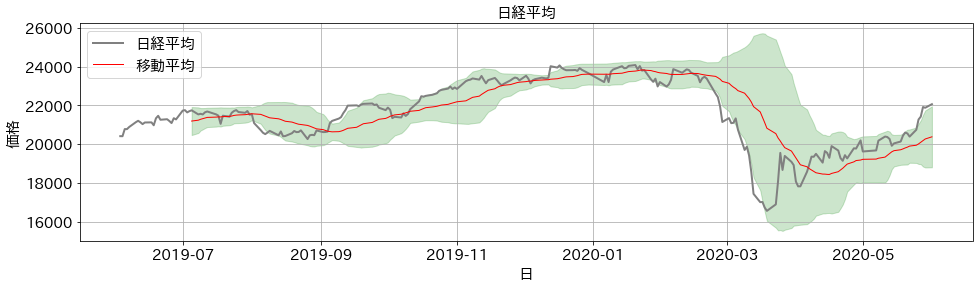

In [36]:
#------------------------------------------------------------------
# 設定項目
#------------------------------------------------------------------
name   = "日経平均"        # 銘柄名(任意の名前)
date   = df_N225.index     # インデックスの日時を取得
price  = df_N225['Close']  # 終値を取得
upper  = df_N225['upper']  # 上限値
middle = df_N225['middle'] # 移動平均
lower  = df_N225['lower']  # 下限値
#------------------------------------------------------------------

# グラフ描画枠作成（２つのグラフを並べるキャンパスを設定）
fig = plt.figure(figsize=(14, 7), tight_layout=True) 

# グラフ作成前に設定するオプション
plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

# グラフ作成
# x軸、y軸、凡例タイトル、線幅
plt.plot(date, price,  label=name, linewidth = 2, color = 'gray') # 日経平均 
plt.plot(date, middle, label='移動平均', linewidth = 1, color = 'red')  # 移動平均
plt.fill_between(date, upper, lower, color='green', alpha=0.2)          # ボリンジャーバンド

# 追加オプション
plt.title(name,fontsize=15)               # グラフタイトル
plt.xlabel('日',fontsize=15)              # x軸ラベル
plt.ylabel('価格',fontsize=15)            # y軸ラベル
plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.yticks(fontsize=15)                   # x軸の目盛文字サイズ
plt.legend(fontsize=15, loc="upper left") # 凡例
plt.grid()                                # 補助線追加

# 出力ファイル名を指定（Googleドライブの場合）
outfile = "drive/My Drive/Colab Notebooks/05_グラフ_"+name+"_ボリンジャーバンド.png"

# # 出力ファイル名を指定（Anacondaの場合, Google Colaboratoryの場合は削除してください)
#outfile = "05_グラフ_"+name+"_ボリンジャーバンド.png" 

plt.savefig(outfile, bbox_inches='tight')  # 画像の保存

plt.show()

----